In [ ]:
# Based on the Github code of : https://github.com/sayantann11/all-classification-templetes-for-ML
# Modified by Mehdi Ammi, Univ. Paris 8

# Scikit-Learn: Logistic Regression (LR)

## Introduction to Decision Tree

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

Linear Regression Equation:

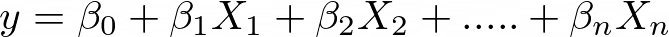

Where, y is a dependent variable and x1, x2 ... and Xn are explanatory variables.

Sigmoid Function:

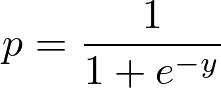

Apply Sigmoid function on linear regression:

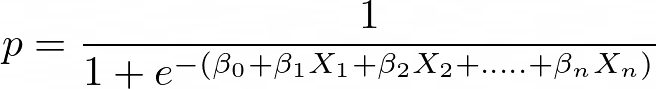


### Properties of Logistic Regression:

The dependent variable in logistic regression follows Bernoulli Distribution.
Estimation is done through maximum likelihood.
No R Square, Model fitness is calculated through Concordance, KS-Statistics.

## Linear Regression Vs. Logistic Regression

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

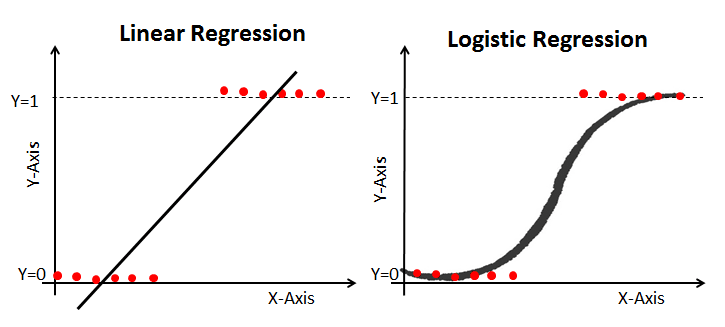

## Maximum Likelihood Estimation Vs. Least Square Method

The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). Both are used to estimate the parameters of a linear regression model. MLE assumes a joint probability mass function, while OLS doesn't require any stochastic assumptions for minimizing distance.

### Sigmoid Function

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that a patient will suffer from cancer.

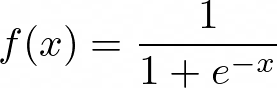

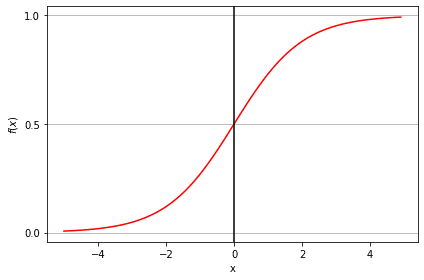

## Types of Logistic Regression

 - Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
 - Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
 - Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

## Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading Data

First, we load the dataset
Then, we extract the features (Age and Estimated Salary) and the target variable (Purchased) from the dataset.

In [ ]:
# Import files module from google.colab for file uploading
from google.colab import files

# Initiates a file upload dialog and stores the uploaded files in a dictionary.
uploaded = files.upload()

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

dataset.head()

|index|User ID|Gender|Age|EstimatedSalary|Purchased|
|---|---|---|---|---|---|
|0|15624510|Male|19|19000|0|
|1|15810944|Male|35|20000|0|
|2|15668575|Female|26|43000|0|
|3|15603246|Female|27|57000|0|
|4|15804002|Male|19|76000|0|

## Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
# Extracting the features (Age and Estimated Salary)
X = dataset.iloc[:, [2, 3]].values  

# Extracting the target variable (Purchased)
y = dataset.iloc[:, 4].values       

## Splitting the Dataset

We split the dataset into training and test sets to evaluate the model's performance. 

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [ ]:
# Importing the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Splitting the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

## Feature Scaling

Feature scaling is applied to standardize the range of independent variables. This is important for many machine learning algorithms, including logistic regression, as it helps in faster convergence of the model during training.

In [ ]:
# Importing the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
sc = StandardScaler()

# Applying feature scaling to the training set
X_train = sc.fit_transform(X_train)

# Applying the same scaling to the test set
X_test = sc.transform(X_test)

## Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using the LogisticRegression() function with random_state for reproducibility.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict(). 

In [ ]:
# Importing the LogisticRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression
classifier = LogisticRegression(random_state = 0)

# Fitting the model to the training data
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

## Evaluating the Model

We evaluate the model's performance using a confusion matrix. The confusion matrix provides a summary of prediction results, showing the counts of true positive, true negative, false positive, and false negative predictions.

In [ ]:
# Importing the confusion_matrix function from scikit-learn's metrics module
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix to evaluate the accuracy of the classification
# The confusion matrix compares the actual target values (y_test) with the predicted target values (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print(cm)

In [ ]:
>>
[[65  3]
 [ 8 24]]

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 65 and 24 are actual predictions, and 8 and 3 are incorrect predictions.

## Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

In [ ]:
# Import required module
import seaborn as sns

# Define the names of the classes
class_names = [0, 1]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Define the tick marks for the x and y axes based on the number of classes
tick_marks = np.arange(len(class_names))

# Set the x and y axis ticks to the class names
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create a heatmap to visualize the confusion matrix
# pd.DataFrame(cm) converts the confusion matrix to a DataFrame for better visualization
# annot=True adds the values in the cells
# cmap="YlGnBu" sets the color map for the heatmap
# fmt='g' ensures the annotations are shown as integers
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')

# Set the labels and title
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

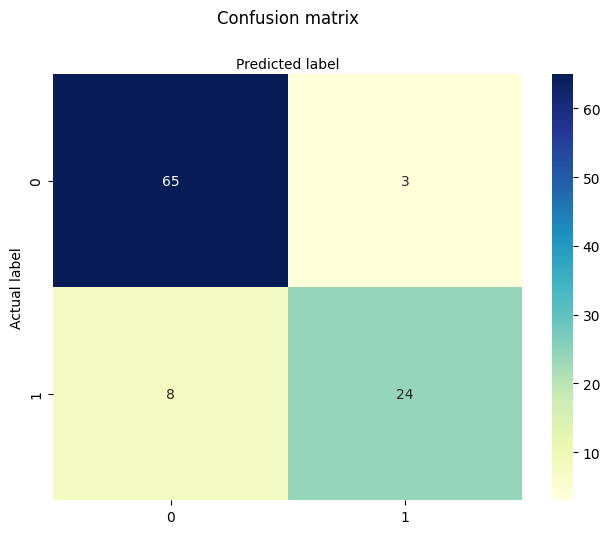

## Confusion Matrix Evaluation Metrics

Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [ ]:
# Importing the classification_report function from scikit-learn's metrics module
from sklearn.metrics import classification_report

# Defining the target names for the classification report
target_names = ['Not Purchased', 'Purchased']

# Printing the classification report
# The classification report includes precision, recall, f1-score, and support for each class
# y_test are the actual target values, y_pred are the predicted target values
# target_names are the names of the classes to be displayed in the report
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
>>
               precision    recall  f1-score   support

not Purchased       0.89      0.96      0.92        68
    Purchased       0.89      0.75      0.81        32

     accuracy                           0.89       100
    macro avg       0.89      0.85      0.87       100
 weighted avg       0.89      0.89      0.89       100

## Visualising the Training set results

We plot the decision boundary with the training set results.

In [ ]:
# Importing the ListedColormap class from matplotlib.colors
from matplotlib.colors import ListedColormap

# Visualising the Training set results
# Setting X_set and y_set to the training set features and labels
X_set, y_set = X_train, y_train

# Creating a meshgrid for the plot
# X1 and X2 represent the grid of values for the features
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plotting the decision boundary
# classifier.predict is used to predict the class for each point in the grid
# The predictions are reshaped to match the shape of X1 for contour plotting
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Setting the limits for the x and y axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the training set points
# Using different colors for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Adding the title and labels to the plot
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Adding the legend to the plot
plt.legend()

# Displaying the plot
plt.show()

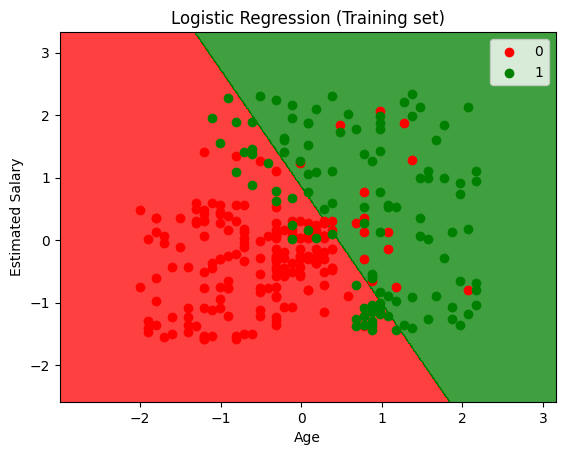

## Visualising the Test set results

We plot the decision boundary with the test set results.

In [ ]:
# Visualising the Test set results
# Setting X_set and y_set to the test set features and labels
X_set, y_set = X_test, y_test

# Creating a meshgrid for the plot
# X1 and X2 represent the grid of values for the features
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plotting the decision boundary
# classifier.predict is used to predict the class for each point in the grid
# The predictions are reshaped to match the shape of X1 for contour plotting
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Setting the limits for the x and y axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the test set points
# Using different colors for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Adding the title and labels to the plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Adding the legend to the plot
plt.legend()

# Displaying the plot
plt.show()

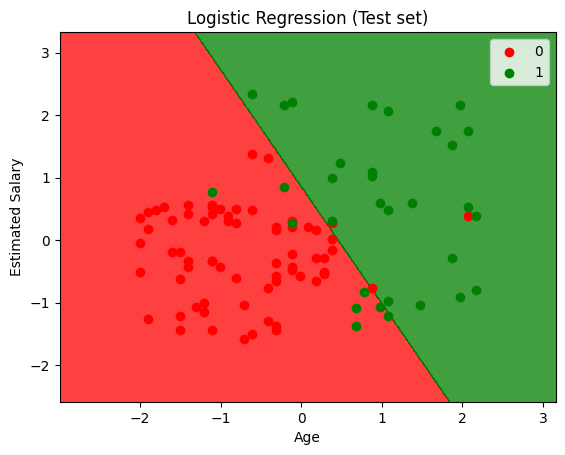

## Exercices

### Exercise 1: Modify the Test Set Size

- Change the test set size to 30% of the total data and evaluate the model's performance.
- Change the test set size to 20% of the total data and evaluate the model's performance.

### Exercise 2: Change the `random_state` Parameter

- Change the `random_state` parameter to 42 and observe the results.
- Change the `random_state` parameter to 1 and observe the results.

### Exercise 3: Experiment with Data Scaling

- Use `MinMaxScaler` instead of `StandardScaler` and evaluate the model's performance.
- Compare the results of `MinMaxScaler` and `StandardScaler`.

### Exercise 4: Change Logistic Regression Parameters

- Change the `solver` parameter to 'liblinear' and evaluate the model's performance.
- Change the `penalty` parameter to 'l1' with the solver 'liblinear' and evaluate the model's performance.

### Exercise 5: Change the Regularization Parameter `C`

- Increase the regularization parameter `C` to 10 and evaluate the model's performance.
- Decrease the regularization parameter `C` to 0.1 and evaluate the model's performance.

### Exercise 6: Use Different Feature Sets

- Use only the "Age" feature for training and evaluate the model's performance.
- Use only the "Estimated Salary" feature for training and evaluate the model's performance.

### Exercise 7: Modify the Maximum Number of Iterations

- Change the maximum number of iterations to 200 and evaluate the model's performance.
- Change the maximum number of iterations to 50 and evaluate the model's performance.

### Exercise 8: Visualize Different Decision Boundaries

- Visualize the decision boundary for the training set with a different `random_state` of your choice.
- Visualize the decision boundary for the test set with a different `random_state` of your choice.

### Exercise 9: Evaluate Different Performance Metrics

- Evaluate the model's performance using precision, recall, and F1-score instead of the confusion matrix.
- Compare the precision, recall, and F1-score for different `solver` parameters.

### Exercise 10: Logistic Regression on the "Iris" Dataset

Perform logistic regression on the Iris dataset to classify the species of iris flowers. Experiment with different parameters to optimize the model's performance.

Instructions:

- Load the Iris Dataset: Use the `load_iris()` function from `sklearn.datasets` to load the Iris dataset.
- Experiment with Different Test Sizes: Modify the code to use test set sizes of 30% and 20% of the total data. Observe the changes in accuracy, precision, and recall.
- Change the `random_state` Parameter: Modify the code to use `random_state=42` and `random_state=1`. Observe the changes in the model's performance.

### Exercise 11: Logistic Regression on the "Wine" Dataset

Perform logistic regression on the Wine dataset to classify the type of wine. Experiment with different parameters to optimize the model's performance.

Instructions:

- Load the Wine Dataset: Use the `load_wine()` function from `sklearn.datasets` to load the Wine dataset.
- Tune the C Parameter: Experiment with different values of the `C` parameter (e.g., `C=0.1`, `C=1`, `C=1000`). Observe how it affects the model's performance.
- Change Logistic Regression Parameters: Modify the `solver` parameter to 'liblinear' and 'lbfgs', and observe the performance changes.

### Exercise 12: Logistic Regression on the "Breast Cancer" Dataset

Perform logistic regression on the Breast Cancer dataset to classify whether the cancer is malignant or benign. Experiment with different parameters to optimize the model's performance.

Instructions:

- Load the Breast Cancer Dataset: Use the `load_breast_cancer()` function from `sklearn.datasets` to load the Breast Cancer dataset.
- Experiment with Data Scaling: Use `MinMaxScaler` instead of `StandardScaler` and evaluate the model's performance.
- Change the Maximum Number of Iterations: Modify the `max_iter` parameter to 50, 100, and 200, and observe the performance changes.

### Exercise 13: Logistic Regression on the "Digits" Dataset

Perform logistic regression on the Digits dataset to classify handwritten digits. Experiment with different parameters to optimize the model's performance.

Instructions:

- Load the Digits Dataset: Use the `load_digits()` function from `sklearn.datasets` to load the Digits dataset.
- Experiment with Different Test Sizes: Modify the code to use test set sizes of 30% and 20% of the total data. Observe the changes in accuracy, precision, and recall.
- Change the `random_state` Parameter: Modify the code to use `random_state=42` and `random_state=1`. Observe the changes in the model's performance.

### Exercise 14: Logistic Regression on the "Diabetes" Dataset

Perform logistic regression on the Diabetes dataset to predict the onset of diabetes. Experiment with different parameters to optimize the model's performance.

Instructions:

- Load the Diabetes Dataset: Use the `load_diabetes()` function from `sklearn.datasets` to load the Diabetes dataset.
- Tune the C Parameter: Experiment with different values of the `C` parameter (e.g., `C=0.1`, `C=1`, `C=1000`). Observe how it affects the model's performance.
- Change Logistic Regression Parameters: Modify the `solver` parameter to 'liblinear' and 'lbfgs', and observe the performance changes.